In [35]:
import pandas as pd #spreadsheet
import requests #get request
from bs4 import BeautifulSoup as soup #html parser
import urllib.request as urequest # for url opeartion
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# the URL you want to visit
url = 'https://tradingeconomics.com/matrix?g=africa'
user_agent ={
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:133.0) Gecko/20100101 Firefox/133.0'
}

In [3]:
africa_eco_data = urequest.Request('https://tradingeconomics.com/matrix?g=africa', None, user_agent)

In [4]:
# accessing the site
request = urequest.urlopen(africa_eco_data)

In [5]:
page = soup(request, 'html.parser')
print(page)


<!DOCTYPE html>

<html>
<head id="ctl00_Head1"><meta charset="utf-8"/><title>
	Africa
</title><meta content="Trading Economics provides data for 20 million economic indicators from 196 countries including actual values, consensus figures, forecasts, historical time series and news. Africa - was last updated on Sunday, December 22, 2024." id="metaDesc" name="description"/><meta content="Africa, economic indicators, data, actual values, historical, time series, forecasts, news" id="metaKeyword" name="keywords"/><meta content="width=device-width,minimum-scale=1,initial-scale=1,maximum-scale=1" name="viewport"/><meta content="#333333" name="theme-color"/>
<link crossorigin="anonymous" href="https://cdnjs.cloudflare.com/ajax/libs/bootstrap/5.2.3/css/bootstrap.min.css" integrity="sha512-SbiR/eusphKoMVVXysTKG/7VseWii+Y3FdHrt0EpKgpToZeemhqHeZeLWLhJutz/2ut2Vw1uQEj2MbRF+TVBUA==" referrerpolicy="no-referrer" rel="stylesheet"/>
<link crossorigin="anonymous" href="https://cdnjs.cloudflare.com/ajax

In [6]:
eco_data = page.find_all('table')
eco_data

[<table class="table table-hover sortable-theme-minimal table-heatmap" data-sortable="" id="matrix">
 <thead class="te-sort">
 <tr>
 <th><span class="matrix-country">Country</span></th>
 <th data-heatmap="1" data-heatmap-dncolor="#78c1ff" data-heatmap-limit="20000">GDP</th>
 <th data-heatmap="1" data-heatmap-limit="5">GDP Growth</th>
 <th data-heatmap="1" data-heatmap-dncolor="#78c1ff" data-heatmap-limit="10">Interest Rate</th>
 <th data-heatmap="1" data-heatmap-limit="20">Inflation Rate</th>
 <th data-heatmap="1" data-heatmap-limit="20">Jobless Rate</th>
 <th data-heatmap="1" data-heatmap-limit="20">Gov. Budget</th>
 <th data-heatmap="1" data-heatmap-dncolor="#78c1ff" data-heatmap-limit="200">Debt/GDP</th>
 <th data-heatmap="1" data-heatmap-limit="10">Current Account</th>
 <th data-heatmap="1" data-heatmap-dncolor="#78c1ff" data-heatmap-limit="1000">Population</th>
 </tr>
 </thead>
 <tr>
 <td><a class="matrix-country" href="/egypt/indicators">Egypt                                     

In [7]:
# Loading data frame
data_eco_df = pd.read_html(str(eco_data))[0]
data_eco_df

C:\Users\USER\AppData\Local\Temp\ipykernel_10764\3648078245.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data_eco_df = pd.read_html(str(eco_data))[0]


,Country,GDP,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Egypt,396,9.80,27.25,25.50,6.70,-7.10,95.80,-1.20,105.90
1,South Africa,378,-0.30,7.75,2.90,32.10,-4.90,72.20,-1.60,62.20
2,Nigeria,363,10.00,27.50,34.60,4.30,-6.10,38.80,-0.30,223.80
3,Algeria,240,3.20,3.00,5.52,11.81,-3.00,55.10,2.90,45.61
4,Ethiopia,164,NaN,7.00,16.90,18.90,-2.70,38.00,-2.40,126.53
5,Morocco,141,1.10,2.50,0.80,13.60,-4.70,69.70,-2.80,37.02
6,Sudan,109,NaN,28.30,146.60,20.80,-4.00,256.00,-2.48,48.11
7,Kenya,107,1.00,11.25,2.80,5.70,-5.30,70.10,-4.00,51.50
8,Angola,85,2.90,19.50,28.41,32.30,-0.10,60.50,4.50,36.68
9,Ivory Coast,79,NaN,5.50,2.50,2.60,-6.70,35.90,-5.80,31.05


In [59]:
data_eco_df["GDP"]=data_eco_df["GDP"].astype(float)

In [60]:
#information about the data
data_eco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          54 non-null     object 
 1   GDP              54 non-null     float64
 2   GDP Growth       20 non-null     float64
 3   Interest Rate    52 non-null     float64
 4   Inflation Rate   54 non-null     float64
 5   Jobless Rate     53 non-null     float64
 6   Gov. Budget      52 non-null     float64
 7   Debt/GDP         51 non-null     float64
 8   Current Account  52 non-null     float64
 9   Population       54 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.3+ KB


In [9]:
# Description of the data
data_eco_df.describe(include="all")

,Country,GDP,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
count,54,54.000000,20.000000,52.000000,54.000000,53.000000,52.000000,51.000000,52.000000,54.000000
unique,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,54.055556,2.118000,10.533269,12.872593,11.390189,-3.189423,64.613137,-3.492115,26.489630
std,NaN,92.018541,3.100548,8.399902,25.271408,9.941914,3.597076,39.246467,8.338580,38.446901
min,NaN,1.000000,-2.500000,1.500000,-0.200000,0.500000,-9.200000,13.300000,-19.400000,0.100000
25%,NaN,6.000000,0.950000,5.000000,2.500000,3.700000,-6.100000,41.500000,-8.050000,2.880000
50%,NaN,18.000000,1.600000,7.000000,4.100000,6.700000,-3.850000,59.000000,-5.300000,13.470000
75%,NaN,49.750000,2.925000,12.187500,11.420000,18.500000,-1.300000,80.500000,0.900000,32.077500


In [10]:
data_eco_df.shape

(54, 10)

## Overview
* Trading Economics provides data for 20 million economic indicators from 196 countries including actual values, consensus figures, forecasts, historical time series and news. Africa - was last updated on Friday, December 20, 2024.

## Objectives of the analysis
* Analyzing Unemployment rate per country
* Analyzing Economic Growth and its Variability Across Countries
* Inflation rates in countries
* Analyzing the impact of Budget Deficits and Trade Balances on economic indicators.

## Objective 1: Analyzing Unemplyment rate Per Country

In [12]:
data_eco_df.head(4)

,Country,GDP,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Egypt,396,9.8,27.25,25.50,6.70,-7.1,95.8,-1.2,105.90
1,South Africa,378,-0.3,7.75,2.90,32.10,-4.9,72.2,-1.6,62.20
2,Nigeria,363,10.0,27.50,34.60,4.30,-6.1,38.8,-0.3,223.80
3,Algeria,240,3.2,3.00,5.52,11.81,-3.0,55.1,2.9,45.61


In [13]:
data_eco_df.columns

Index(['Country', 'GDP', 'GDP Growth', 'Interest Rate', 'Inflation Rate',
       'Jobless Rate', 'Gov. Budget', 'Debt/GDP', 'Current Account',
       'Population'],
      dtype='object')

In [18]:
empoly_data = data_eco_df.groupby('Country')[['Jobless Rate','Population']].sum()
empoly_data

,Jobless Rate,Population
Country,,
Algeria,11.81,45.61
Angola,32.30,36.68
Benin,1.40,13.32
Botswana,27.60,2.68
Burkina Faso,5.00,22.75
Burundi,0.90,13.24
Cameroon,3.70,28.60
Cape Verde,10.30,0.59
Central African Republic,6.30,5.74


In [44]:
# The top Ten countries with the highest rate of unemployment
top_10_unemploy = empoly_data.nlargest(10,"Jobless Rate").sort_values(by="Jobless Rate", ascending = False)
top_10_unemploy

,Jobless Rate,Population
Country,,
Congo,46.10,95.02
Angola,32.30,36.68
South Africa,32.10,62.20
Djibouti,27.90,1.14
Botswana,27.60,2.68
Mozambique,25.04,32.42
Swaziland,22.20,1.19
Senegal,21.60,18.30
Sudan,20.80,48.11


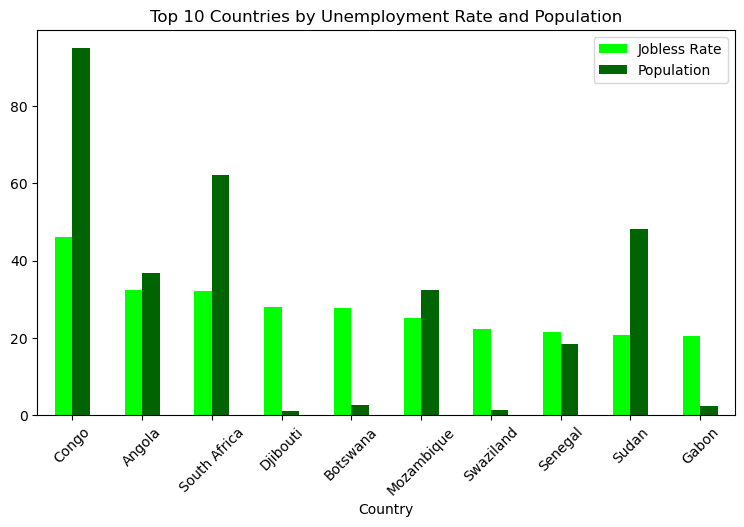

In [115]:
# plotting the findings
top_10_unemploy.plot(kind="bar",color=["lime","darkgreen"], figsize=(9,5), rot= 45)
plt.title("Top 10 Countries by Unemployment Rate and Population")
plt.show()

The analysis shows Congo with the highest unemployment rate (46.10%) and a large population (95.02M), reflecting significant labor challenges. Angola and South Africa, with rates above 32%, face systemic issues despite populations of 36.68M and 62.20M. Smaller nations like Djibouti and Swaziland also struggle with high unemployment (27.90% and 22.20%) despite their size. These findings highlight the need for targeted economic policies to address unemployment and foster workforce development in the country.

In [80]:
empoly_data.corr()

,Jobless Rate,Population
Jobless Rate,1.000000,0.108357
Population,0.108357,1.000000


## Objective 2:Analyzing Economic Growth and its Variability Across Countries

In [53]:
data_eco_df.head(4)

,Country,GDP,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Egypt,396,9.8,27.25,25.50,6.70,-7.1,95.8,-1.2,105.90
1,South Africa,378,-0.3,7.75,2.90,32.10,-4.9,72.2,-1.6,62.20
2,Nigeria,363,10.0,27.50,34.60,4.30,-6.1,38.8,-0.3,223.80
3,Algeria,240,3.2,3.00,5.52,11.81,-3.0,55.1,2.9,45.61


In [69]:
eco_var = data_eco_df.groupby("Country")[["GDP","GDP Growth"]].mean()
eco_var

,GDP,GDP Growth
Country,,
Algeria,240.0,3.20
Angola,85.0,2.90
Benin,20.0,NaN
Botswana,19.0,1.40
Burkina Faso,20.0,NaN
Burundi,3.0,NaN
Cameroon,48.0,2.70
Cape Verde,3.0,-2.50
Central African Republic,3.0,NaN


In [103]:
top = eco_var.nlargest(10,"GDP Growth").sort_values(by="GDP", ascending = False)
top

,GDP,GDP Growth
Country,,
Egypt,396.0,9.8
Nigeria,363.0,10.0
Algeria,240.0,3.2
Angola,85.0,2.9
Ghana,76.0,1.7
Uganda,49.0,3.2
Cameroon,48.0,2.7
Senegal,31.0,2.1
Mozambique,21.0,2.0


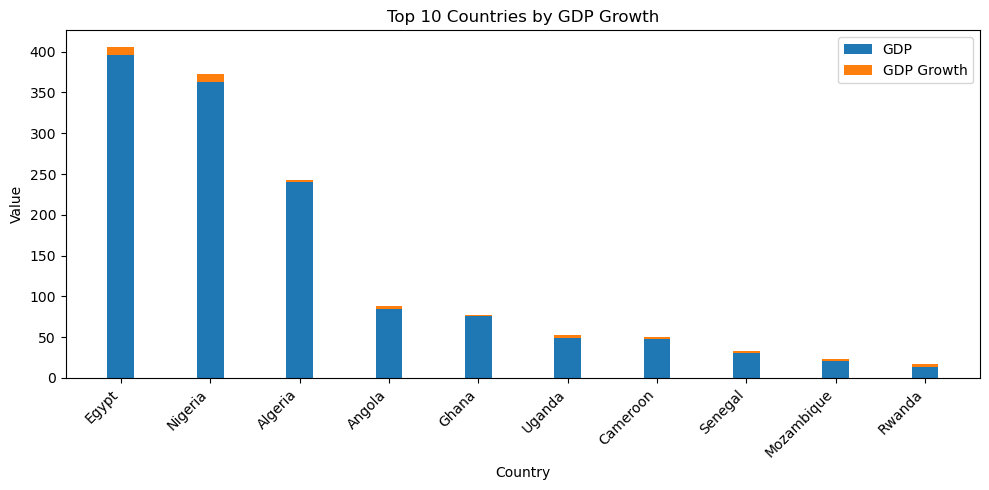

In [104]:
# Plotting findings
fig, ax = plt.subplots(figsize=(10, 5))
# Define bar width
bar_width = 0.3
# Create an array of the country indices for positioning
indices = np.arange(len(top))
# Plot GDP bars
bar1 = ax.bar(indices, top["GDP"], bar_width, label='GDP')
# Plot GDP Growth bars on top of GDP bars
bar2 = ax.bar(indices, top["GDP Growth"], bar_width, bottom=top["GDP"], label='GDP Growth')
# Add country labels to the x-axis
ax.set_xticks(indices)
ax.set_xticklabels(top.index, rotation=45, ha='right')
# Add titles and labels
ax.set_title('Top 10 Countries by GDP Growth')
ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.legend()
# Display the plot
plt.tight_layout()
plt.show()


Nigeria and Egypt boast the highest GDPs of 363 and 396 billion dollars, respectively, with Nigeria achieving a higher growth rate of 10%. Rwanda and Mozambique have the lowest GDPs, emphasizing varied economic conditions and growth potentials across the continent. This diversity underscores the need for tailored policies to foster sustainable development.

## Objective 3: Inflation rates in countries

In [100]:
data_eco_df.head(4)

,Country,GDP,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Egypt,396.0,9.8,27.25,25.50,6.70,-7.1,95.8,-1.2,105.90
1,South Africa,378.0,-0.3,7.75,2.90,32.10,-4.9,72.2,-1.6,62.20
2,Nigeria,363.0,10.0,27.50,34.60,4.30,-6.1,38.8,-0.3,223.80
3,Algeria,240.0,3.2,3.00,5.52,11.81,-3.0,55.1,2.9,45.61


In [102]:
inflation = data_eco_df.groupby("Country")[["Inflation Rate"]].sum()
inflation

,Inflation Rate
Country,
Algeria,5.52
Angola,28.41
Benin,0.60
Botswana,1.70
Burkina Faso,3.60
Burundi,24.90
Cameroon,4.40
Cape Verde,1.60
Central African Republic,1.70


In [106]:
top_inflation = inflation.nlargest(10,"Inflation Rate").sort_values(by="Inflation Rate", ascending = False)
top_inflation

,Inflation Rate
Country,
Sudan,146.60
South Sudan,107.30
Zimbabwe,57.50
Nigeria,34.60
Angola,28.41
Malawi,27.00
Egypt,25.50
Burundi,24.90
Ghana,23.00


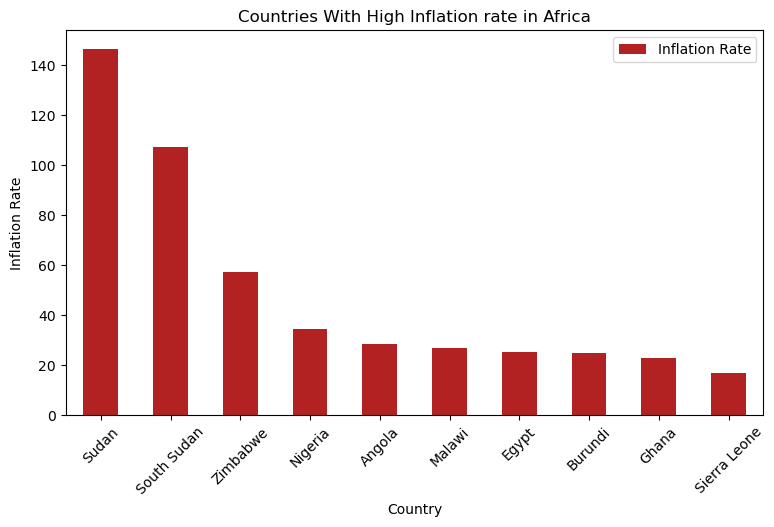

In [116]:
# plotting the findings
top_inflation.plot(kind="bar",color="firebrick", figsize=(9,5), rot=45)
plt.title("Countries With High Inflation rate in Africa")
plt.ylabel("Inflation Rate")
plt.show()

The data on inflation rates across various African countries reveals significant disparities. Sudan and South Sudan face the highest inflation rates at 146.60% and 107.30%, respectively, indicating severe economic instability. Zimbabwe also experiences high inflation at 57.50%. Nigeria's inflation rate stands at 34.60%, higher than Angola's 28.41% and Malawi's 27.00%. Egypt, Burundi, Ghana, and Sierra Leone have comparatively lower inflation rates, with Sierra Leone the lowest at 16.92%. These varying inflation rates highlight the diverse economic challenges these countries face, with some grappling with hyperinflation and others managing relatively more stable economic environments. Addressing inflation effectively requires tailored economic policies to ensure sustainable growth and stability across the continent.

## Objective 3: Analyzing the impact of Budget Deficits and Trade Balances on economic indicators.

The main objective is to identify which countries have expenditures that surpass their revenues and which ones do not.


In [121]:
# Filter countries with a budget deficit
budget_deficit_neg =data_eco_df[data_eco_df["Gov. Budget"] < 0]
budget_deficit_neg


,Country,GDP,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Egypt,396.0,9.80,27.25,25.50,6.70,-7.10,95.80,-1.20,105.90
1,South Africa,378.0,-0.30,7.75,2.90,32.10,-4.90,72.20,-1.60,62.20
2,Nigeria,363.0,10.00,27.50,34.60,4.30,-6.10,38.80,-0.30,223.80
3,Algeria,240.0,3.20,3.00,5.52,11.81,-3.00,55.10,2.90,45.61
4,Ethiopia,164.0,NaN,7.00,16.90,18.90,-2.70,38.00,-2.40,126.53
5,Morocco,141.0,1.10,2.50,0.80,13.60,-4.70,69.70,-2.80,37.02
6,Sudan,109.0,NaN,28.30,146.60,20.80,-4.00,256.00,-2.48,48.11
7,Kenya,107.0,1.00,11.25,2.80,5.70,-5.30,70.10,-4.00,51.50
8,Angola,85.0,2.90,19.50,28.41,32.30,-0.10,60.50,4.50,36.68
9,Ivory Coast,79.0,NaN,5.50,2.50,2.60,-6.70,35.90,-5.80,31.05


In [124]:
budget_deficit_pos =data_eco_df[data_eco_df["Gov. Budget"]>  0]
budget_deficit_pos

,Country,GDP,GDP Growth,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
10,Tanzania,79.0,1.5,6.0,3.0,8.9,4.2,38.30,-7.1,61.74
11,Ghana,76.0,1.7,27.0,23.0,3.6,3.1,84.90,1.4,34.12
13,Libya,50.0,NaN,3.0,2.4,18.5,8.5,83.00,23.3,6.89
29,Republic of the Congo,15.0,NaN,5.0,2.1,19.8,4.2,96.46,3.5,6.11
33,Chad,13.0,NaN,5.0,9.0,1.0,4.0,35.10,1.7,18.28
34,Equatorial Guinea,12.0,NaN,5.0,2.5,8.5,0.8,42.40,0.9,1.71


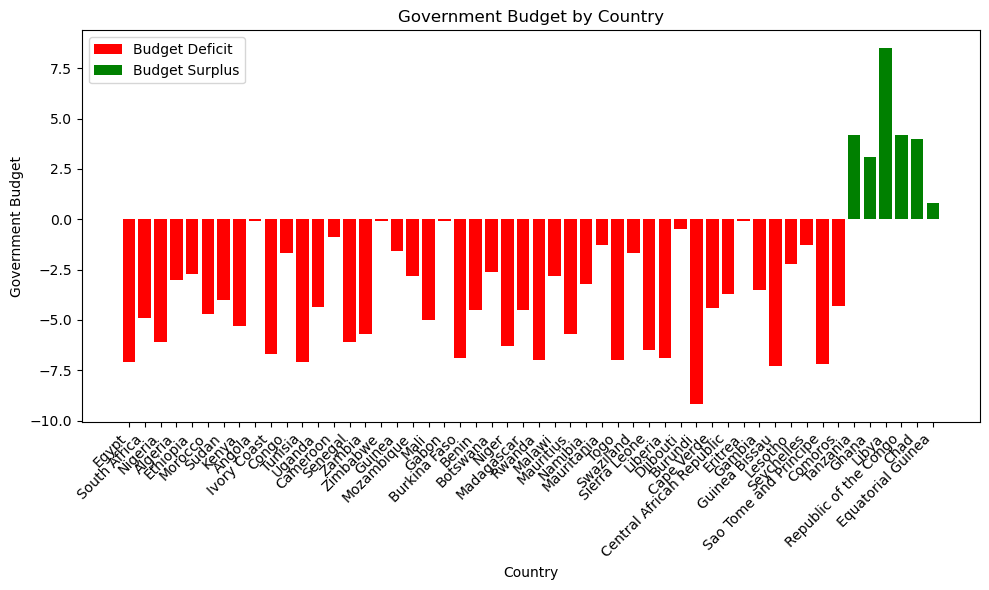

In [127]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# Plot budget deficit
ax.bar(budget_deficit_neg['Country'], budget_deficit_neg['Gov. Budget'], color='red', label='Budget Deficit')
# Plot budget surplus
ax.bar(budget_deficit_pos['Country'], budget_deficit_pos['Gov. Budget'], color='green', label='Budget Surplus')
# Adding titles and labels
ax.set_title('Government Budget by Country')
ax.set_xlabel('Country')
ax.set_ylabel('Government Budget')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


Most countries experience budget deficits, with Egypt (-7.10), South Africa (-4.90), and Nigeria (-6.10) among those spending more than their revenue. However, a few nations show surpluses, indicating healthier fiscal management. Notable examples include Tanzania and the Republic of the Congo, both with a surplus of 4.2, and Libya with 8.5. These surpluses suggest better financial stability in these regions compared to others facing significant deficits. Overall, the data underscores the diverse economic conditions across the continent, reflecting both challenges and prudent fiscal management.

## Conclusion:
The analysis highlights substantial economic disparities across various African countries. The Republic of the Congo has the highest unemployment rate at 46.10%, reflecting severe labor market challenges. Other countries such as Angola and South Africa also face high unemployment rates above 32%. In contrast, Nigeria and Egypt exhibit the highest GDPs of 363 and 396 billion dollars, respectively, with Nigeria achieving a notable growth rate of 10%. There are significant inflation disparities, with Sudan and South Sudan facing hyperinflation, while Sierra Leone has a relatively lower rate. Most countries experience budget deficits, though a few, like Tanzania and the Republic of the Congo, show budget surpluses, suggesting better fiscal health.

## Recommendation:
* Targeted Employment Policies: Implement strategies focused on job creation and workforce development, particularly in countries with high unemployment rates.
* Economic Diversification: Encourage economic diversification to reduce dependency on a few sectors and promote sustainable growth.

* Inflation Control: Develop tailored economic policies to manage and stabilize inflation, especially in countries experiencing hyperinflation.

* Fiscal Management: Strengthen fiscal policies to manage budget deficits and enhance government revenue.